<a href="https://colab.research.google.com/github/danielaz1/python/blob/master/Copy_of_Lab3_nai_szablon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorium 3: NAI - Computer vision / Przetwarzanie obrazów

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

## Rysowanie - przekątna, kwadrat, okręgi

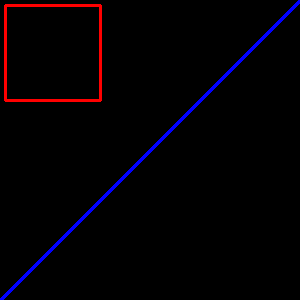

In [0]:
# Inicjalizacja kwadratu o rozmiarze: 300 x 300 px, 3 kanały
canvas = np.zeros((300, 300, 3), dtype="uint8")

# Zad 1a: Narysuj przekątną w kwadracie. Przekątna ma być koloru niebieskiego o 2 px grubości. - 1 pkt
cv2.line(canvas,(0,300),(300,0),(255,0,0),2)
# Zad 1b: Narysuj czerwony kwadrat w lewym górnym rogu, którego krawędź ma grubość 2 px. - 1 pkt
cv2.rectangle(canvas,(5,5),(100,100),(0,0,255),2)
cv2_imshow(canvas)


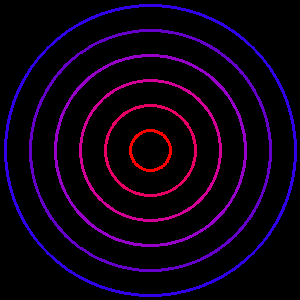

In [0]:
# Stworzenie nowego płótna do rysowania okręgów
canvas = np.zeros((300, 300, 3), dtype="uint8")


# Zad 2: Narysuj 6 okręgów o wspólnym środku, promień każdego okręgu musi być o 25 px większy
# od poprzedniego - 2 pkt. 
# Funkcje pomocnicze: shape, circle

cv2.circle(canvas,(150,150),(20),(0,0,255),2)
cv2.circle(canvas,(150,150),(45),(100,0,230),2)
cv2.circle(canvas,(150,150),(70),(150,0,210),2)
cv2.circle(canvas,(150,150),(95),(200,0,150),2)
cv2.circle(canvas,(150,150),(120),(200,0,100),2)
cv2.circle(canvas,(150,150),(145),(230,0,50),2)
cv2_imshow(canvas)

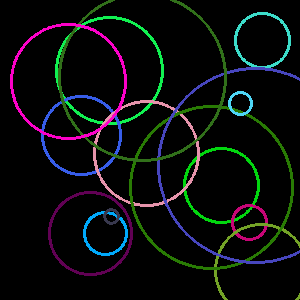

In [0]:
# Zad 3: Narysuj 15 okręgów o losowym rozmiarze, kolorze i pozycji. - 2 pkt.
# Funkcje pomocnicze: np.random.randint, cv2.circle, cv2_imshow(IMAGE)

canvas = np.zeros((300, 300, 3), dtype="uint8")

for i in range(0,15):
  centerX = np.random.randint(20, 280)
  centerY = np.random.randint(20, 280)
  radius = np.random.randint(1, 100)
  blue = np.random.randint(0, 255)
  green = np.random.randint(0, 255)
  red = np.random.randint(0, 255)

  cv2.circle(canvas, (centerX, centerY), radius, (blue, green, red), 2)

cv2_imshow(canvas)


## Przycinanie

In [0]:
# Zad 4: Załaduj oryginalny obrazek (`apple_crop.jpg`) i wytnij z obrazka zielone jabłko. - 2 pkt
# Funkcje pomocnicze: cv2.imread, cv2_imshow(IMAGE) 


In [0]:
from google.colab import files
uploaded = files.upload()

Saving cat.png to cat (1).png


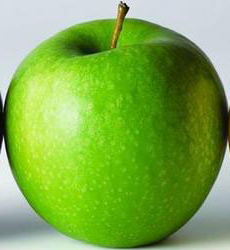

In [0]:
img = cv2.imread('apple_crop.jpg')
croppedImage = img[160:410, 260:490]
cv2_imshow(croppedImage)

## Obracanie

In [0]:
# Zad 5: Obracanie obrazu `apple_crop.jpg`:
# 1. Obróć obraz w przestrzeni poziomej (horyzontalnie) - 1 ptk
# 2. Obróć obraz w przestrzeni poziomej i pionowej  (horyzontalnie i wertykalnie) - 1 pkt
# Funkcje pomocnicze: cv2.flip


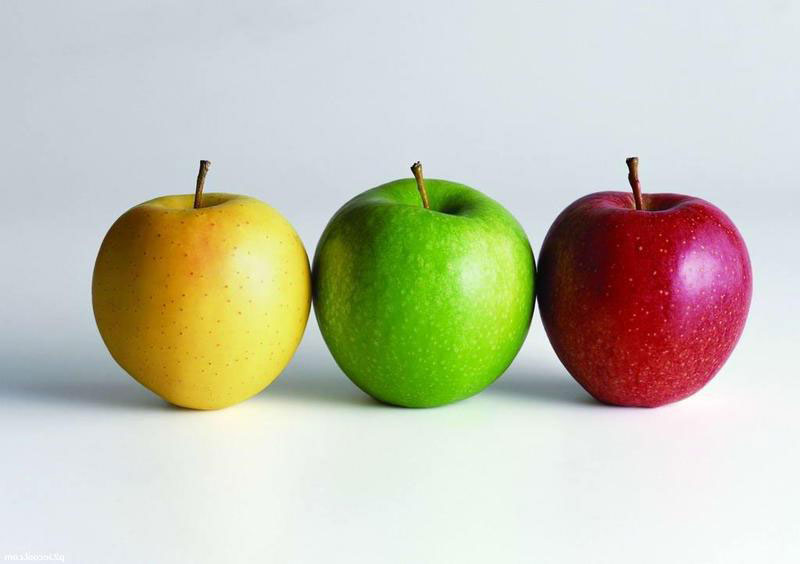

In [0]:
horizontal = cv2.flip(img, 1)
cv2_imshow(horizontal)

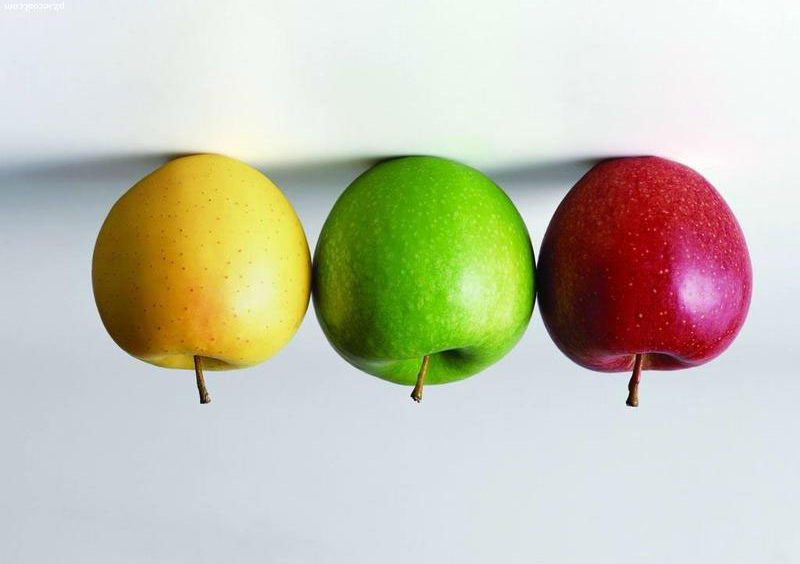

In [0]:
hor_vert = cv2.flip(img, -1)
cv2_imshow(hor_vert)

## Zmiana rozmiaru

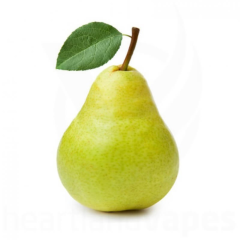

In [0]:
# Zad 6: Wczytaj obraz `pear.jpg` i zmiejsz go zachowując istniejące proporcje. - 2 pkt
# Funkcje pomocnicze: cv2.resize, cv2_imshow

pear = cv2.imread('pear.jpg')

scale_percent = 30
width = int(pear.shape[1] * scale_percent / 100)
height = int(pear.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(pear, dim, interpolation = cv2.INTER_AREA)

cv2_imshow(resized)



## Znajdowanie konturu na obrazie

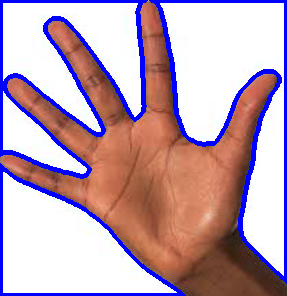

In [0]:
# Zad 7: Zaznacz kolorem niebieskim kontur dłoni z obrazka (`raised_hand.PNG`). Domyślnie obrazy wczytywane z
# wykorzystaniem funkcji `cv2_imread` są w przestrzeni barw BGR.
# Funkcje pomocnicze: `cvtColor`, `findContours`, `drawContours` - 4 pkt

img = cv2.imread('raised_hand.PNG')

#convert img to grey
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#set a thresh
thresh = 210
#get threshold image
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
#find contours
# CV_RETR_TREE calculates the full hierarchy of the contours. 
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw the contours on the empty image
cv2.drawContours(img, contours, -1, (255,0,0), 3)

cv2_imshow(img)


## Detekcja krawędzi z wykorzystaniem algorytmu Canny

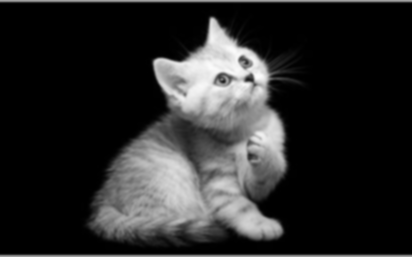

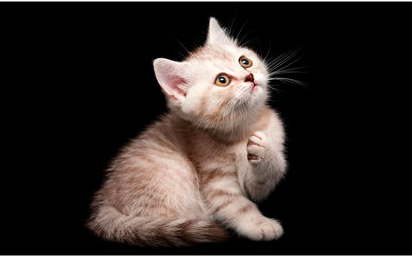

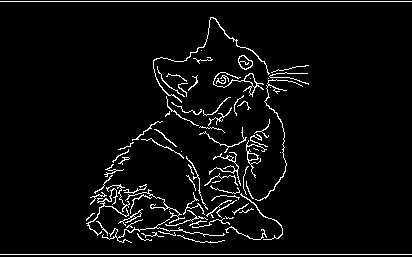

In [0]:
# Zad 8* (zadanie dodatkowe): Wykorzystując algorytm Canny detekcji krawędzi w obrazie (https://pl.wikipedia.org/wiki/Canny) znajdź 
# krawędzie występujące na obrazie `cat.jpg`. - 4 ptk
# Funkcje pomocnicze: `cvtColor`, `GaussianBlur` (algorytm wykrywania krawędzi na obrazie jest podatny na zaszumienie,
# stąd warto usunąć zaszumienie z obrazu z wykorzystaniem 5x5 filtru Gaussian)

img = cv2.imread('cat.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
 
# apply Canny edge detection
contours = cv2.Canny(blurred, 10, 140)
 
# show the images
cv2_imshow(blurred)
cv2_imshow(img)
cv2_imshow(contours)

